In [ ]:
!pip install svgling

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
import pandas as pd

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

In [ ]:
text = """Apple Inc. is planning to open a new headquarters
in Austin, Texas.
CEO Tim Cook announced the plan along with Harry Potter"""

In [ ]:
text2 = "Harry Potter, goes to Hogwarts"

In [ ]:
tokens = word_tokenize(text)

In [ ]:
tokens

['Apple',
 'Inc.',
 'is',
 'planning',
 'to',
 'open',
 'a',
 'new',
 'headquarters',
 'in',
 'Austin',
 ',',
 'Texas',
 '.',
 'CEO',
 'Tim',
 'Cook',
 'announced',
 'the',
 'plan',
 'along',
 'with',
 'Harry',
 'Potter']

In [ ]:
pos_tags = pos_tag(tokens)

In [ ]:
pos_tags

[('Apple', 'NNP'),
 ('Inc.', 'NNP'),
 ('is', 'VBZ'),
 ('planning', 'VBG'),
 ('to', 'TO'),
 ('open', 'VB'),
 ('a', 'DT'),
 ('new', 'JJ'),
 ('headquarters', 'NN'),
 ('in', 'IN'),
 ('Austin', 'NNP'),
 (',', ','),
 ('Texas', 'NNP'),
 ('.', '.'),
 ('CEO', 'NNP'),
 ('Tim', 'NNP'),
 ('Cook', 'NNP'),
 ('announced', 'VBD'),
 ('the', 'DT'),
 ('plan', 'NN'),
 ('along', 'IN'),
 ('with', 'IN'),
 ('Harry', 'NNP'),
 ('Potter', 'NNP')]

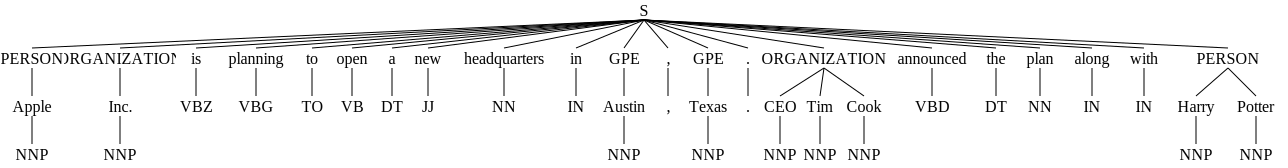

In [ ]:
ne_tree = ne_chunk(pos_tags)
ne_tree

In [ ]:
bio_tags = tree2conlltags(ne_tree)

In [ ]:
bio_tags

[('Apple', 'NNP', 'B-PERSON'),
 ('Inc.', 'NNP', 'B-ORGANIZATION'),
 ('is', 'VBZ', 'O'),
 ('planning', 'VBG', 'O'),
 ('to', 'TO', 'O'),
 ('open', 'VB', 'O'),
 ('a', 'DT', 'O'),
 ('new', 'JJ', 'O'),
 ('headquarters', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Austin', 'NNP', 'B-GPE'),
 (',', ',', 'O'),
 ('Texas', 'NNP', 'B-GPE'),
 ('.', '.', 'O'),
 ('CEO', 'NNP', 'B-ORGANIZATION'),
 ('Tim', 'NNP', 'I-ORGANIZATION'),
 ('Cook', 'NNP', 'I-ORGANIZATION'),
 ('announced', 'VBD', 'O'),
 ('the', 'DT', 'O'),
 ('plan', 'NN', 'O'),
 ('along', 'IN', 'O'),
 ('with', 'IN', 'O'),
 ('Harry', 'NNP', 'B-PERSON'),
 ('Potter', 'NNP', 'I-PERSON')]

In [ ]:
entities = []
current_entity = []
current_type = None

In [ ]:
for word, pos, tag in bio_tags:
    if tag.startswith('B-'):  # Beginning of entity
        if current_entity:
            entities.append((' '.join(current_entity), current_type))
        current_entity = [word]
        current_type = tag[2:]
    elif tag.startswith('I-'):  # Inside entity
        if current_entity and current_type == tag[2:]:
            current_entity.append(word)
        elif not current_entity:
            current_entity = [word]
            current_type = tag[2:]
    else:  # Outside entity (O tag)
        if current_entity:
            entities.append((' '.join(current_entity), current_type))
            current_entity = []
            current_type = None

In [ ]:
if current_entity:
    entities.append((' '.join(current_entity), current_type))

In [ ]:
entities

[('Apple', 'PERSON'),
 ('Inc.', 'ORGANIZATION'),
 ('Austin', 'GPE'),
 ('Texas', 'GPE'),
 ('CEO Tim Cook', 'ORGANIZATION'),
 ('Harry Potter', 'PERSON')]

In [ ]:
import spacy

In [ ]:
word_dict = spacy.load("en_core_web_sm")

In [ ]:
doc = word_dict(text)

In [ ]:
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

Apple Inc. - ORG
Austin - GPE
Texas - GPE
Tim Cook - PERSON
Harry Potter - PERSON
